In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
from datetime import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
B = pd.read_csv('Company B - Data.csv')

In [ ]:
B.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Text(0.5, 1.0, 'Churn Rate by Contract')

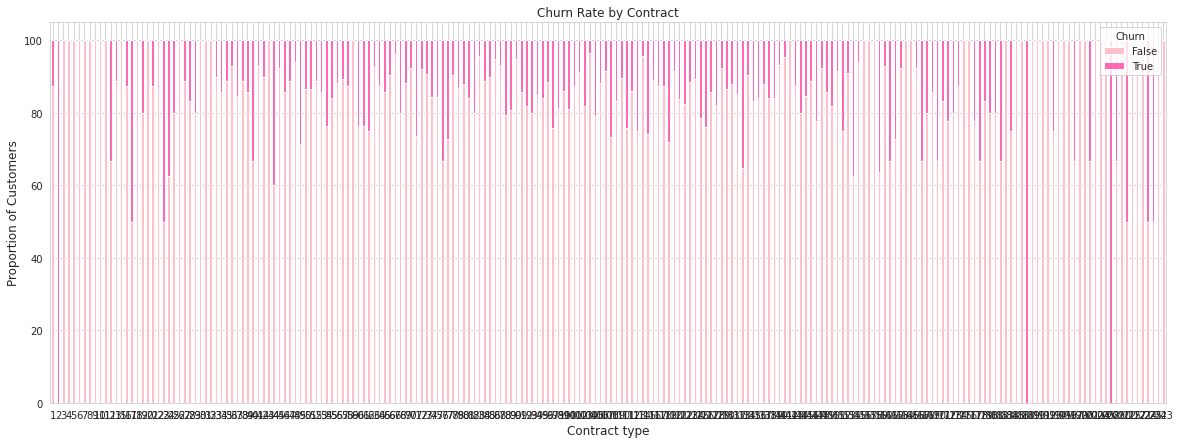

In [ ]:
import matplotlib.ticker as mtick

contract_churn = B.groupby(['Account length','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (20,7),
                                                                color = colors)
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('Contract type', fontsize = 'large')
plt.title('Churn Rate by Contract')

Text(0.5, 1.0, 'Churn Rate by number of customer service calls')

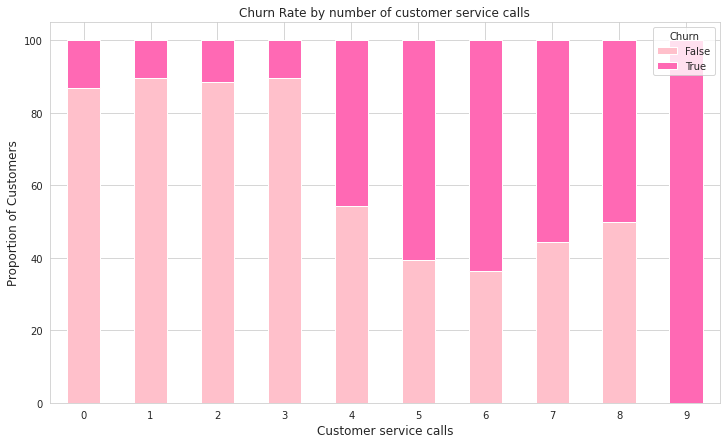

In [ ]:
contract_churn = B.groupby(['Customer service calls','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('Customer service calls', fontsize = 'large')
plt.title('Churn Rate by number of customer service calls')

Text(0.5, 1.0, 'Churn Rate by State')

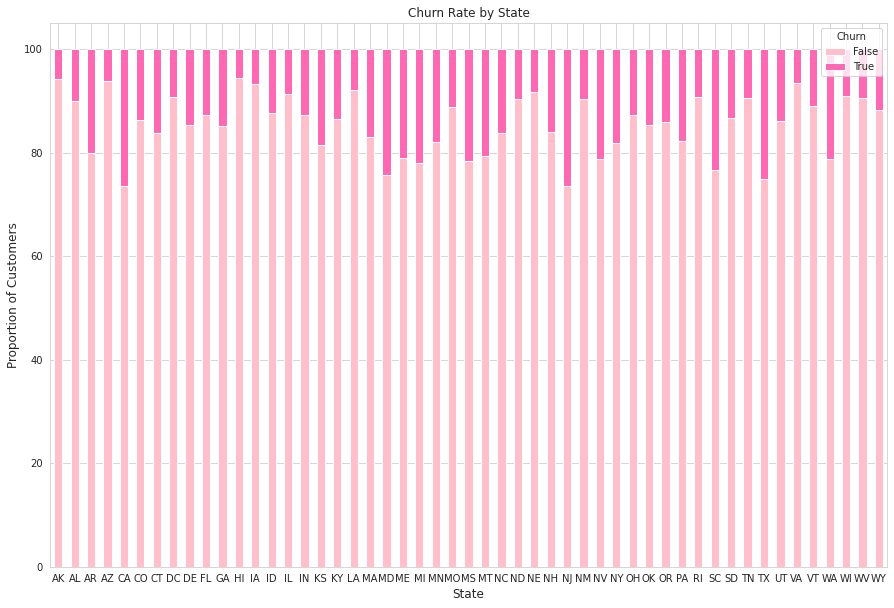

In [ ]:
contract_churn = B.groupby(['State','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,10),
                                                                color = colors)
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('State', fontsize = 'large')
plt.title('Churn Rate by State')

Text(0.5, 1.0, 'Churn Rate by total day mins')

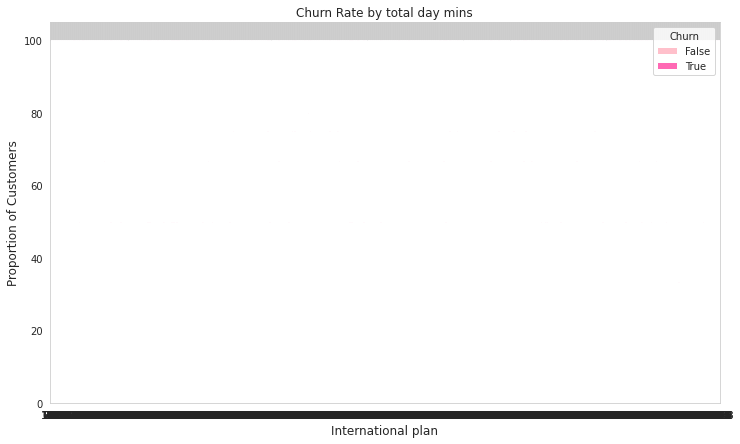

In [ ]:
contract_churn = B.groupby(['Total day minutes','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('International plan', fontsize = 'large')
plt.title('Churn Rate by total day mins')



Text(0.5, 1.0, 'Churn Rate by total intl plan')

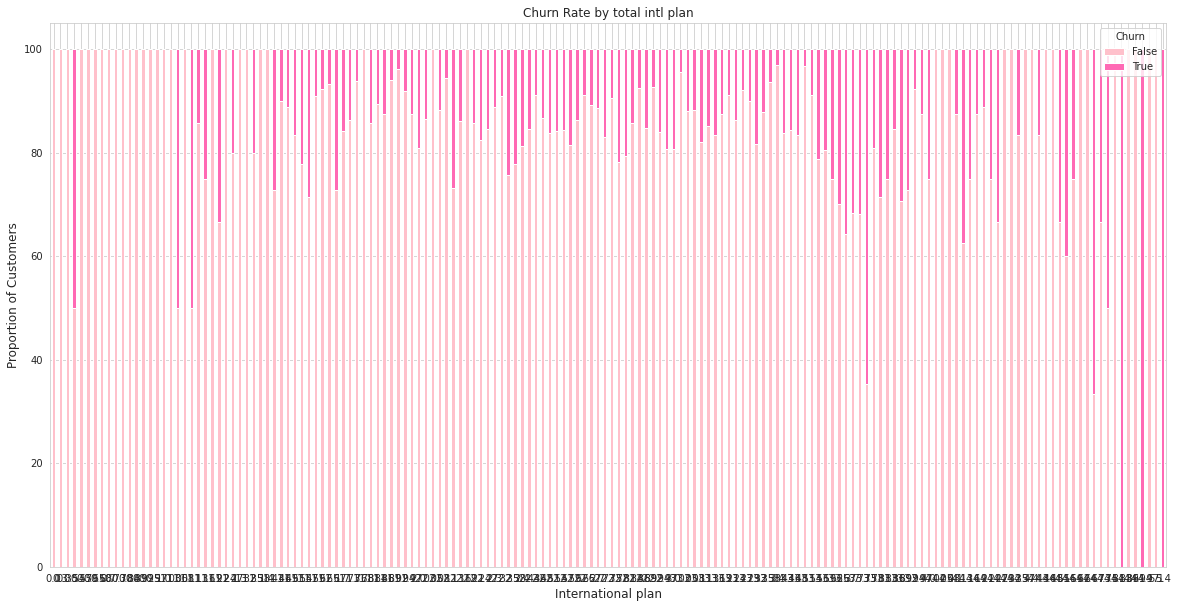

In [ ]:
contract_churn = B.groupby(['Total intl charge','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (20,10),
                                                                color = colors)
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('International plan', fontsize = 'large')
plt.title('Churn Rate by total intl plan')

Text(0.5, 1.0, 'Churn Rate by type of plan')

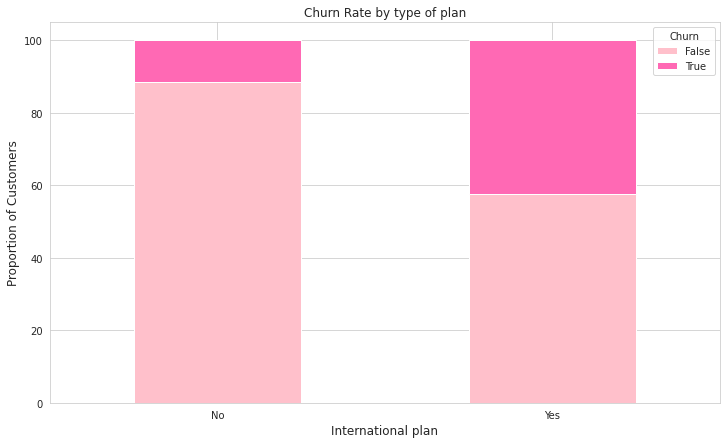

In [ ]:
contract_churn = B.groupby(['International plan','Churn']).size().unstack()
colors  = ['pink','hotpink']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)
plt.ylabel('Proportion of Customers',fontsize = 'large')
plt.xlabel('International plan', fontsize = 'large')
plt.title('Churn Rate by type of plan')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
le = LabelEncoder()

le_count = 0
for col in B.columns[1:]:
    if B[col].dtype == 'object':
        if len(list(B[col].unique())) <= 2:
            le.fit(B[col])
            B[col] = le.transform(B[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [ ]:
cust = B["State"]

data = B.drop(columns="State")
data= pd.get_dummies(data)
data = pd.concat([data, cust], axis = 1)

In [ ]:
cust = data["Churn"]
data = data.drop(columns="Churn")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, cust,
                                                    stratify=cust, 
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
train_id = X_train['State']
X_train = X_train.drop(columns = ['State'])

test_id = X_test['State']
X_test = X_test.drop(columns = ['State'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train1 = scaler.fit_transform(X_train)
train2 = scaler.fit_transform(X_test)

Text(33.0, 0.5, 'True')

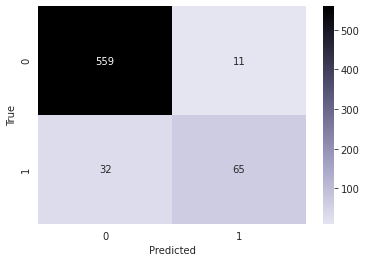

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
dec_tree= tree.fit(X_train, y_train)
tree_Pred = tree.predict(X_test).astype(int)

#Confusion Matrix 

from sklearn import metrics
cnf_matrix = (metrics.confusion_matrix(y_test, tree_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_matrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
acc = accuracy_score(y_test, tree_Pred )
prec = precision_score(y_test, tree_Pred )
rec = recall_score(y_test, tree_Pred )
f1 = f1_score(y_test, tree_Pred )

In [ ]:
results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.935532,0.855263,0.670103,0.751445


Text(33.0, 0.5, 'True')

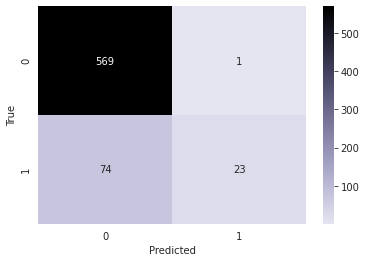

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 3, min_samples_split=3, n_estimators = 200, random_state = 42)
model_for = forest.fit(X_train, y_train)
forest_Pred = forest.predict(X_test).astype(int)

#Confusion Matrix 

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(y_test, forest_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
acc = accuracy_score(y_test, forest_Pred )
prec = precision_score(y_test, forest_Pred )
rec = recall_score(y_test, forest_Pred )
f1 = f1_score(y_test, forest_Pred )

In [ ]:
results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.887556,0.958333,0.237113,0.380165


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(33.0, 0.5, 'True')

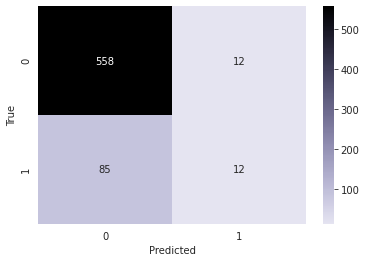

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(y_test,y_pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

In [ ]:
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.854573,0.5,0.123711,0.198347


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

rnd_clf = RandomForestClassifier() 
tree = DecisionTreeClassifier()
log_reg = LogisticRegression() 
voting_clf = VotingClassifier(
estimators=[('lr', log_reg),('rf', rnd_clf), ('dc', tree)], voting='soft')
voting_clf.fit(X_train, y_train)
predict = voting_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(33.0, 0.5, 'True')

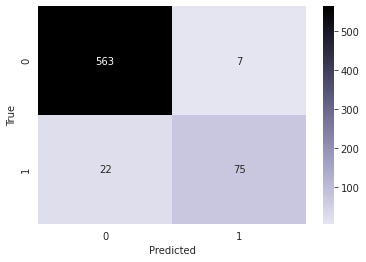

In [ ]:
from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(y_test, predict))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
acc = accuracy_score(y_test, predict )
prec = precision_score(y_test, predict )
rec = recall_score(y_test, predict )
f1 = f1_score(y_test, predict )

In [ ]:
results = pd.DataFrame([['Voting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Voting,0.956522,0.914634,0.773196,0.837989


# Feature importance

"Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable"

In [ ]:
from sklearn import feature_selection

In [ ]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'State').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
17,Customer service calls,0.459031
2,International plan,0.281976
14,Total intl minutes,0.061746
16,Total intl charge,0.016567
5,Total day minutes,0.009822
8,Total eve minutes,0.003696
7,Total day charge,0.001669
11,Total night minutes,0.000176
10,Total eve charge,0.000174
13,Total night charge,-0.000134


In [ ]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'State').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(forest.feature_importances_), columns = ["feature_importances_"])
           ],axis = 1)

feature_importances.sort_values("feature_importances_", ascending = False)

,features,feature_importances_
5,Total day minutes,0.217669
7,Total day charge,0.216665
17,Customer service calls,0.151628
2,International plan,0.151035
8,Total eve minutes,0.039981
4,Number vmail messages,0.039814
14,Total intl minutes,0.037476
15,Total intl calls,0.031193
10,Total eve charge,0.028453
16,Total intl charge,0.026238


In [ ]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'State').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(dec_tree.feature_importances_), columns = ["feature_importances_"])
           ],axis = 1)

feature_importances.sort_values("feature_importances_", ascending = False)

,features,feature_importances_
5,Total day minutes,0.306841
2,International plan,0.157496
17,Customer service calls,0.154456
16,Total intl charge,0.100364
10,Total eve charge,0.074670
15,Total intl calls,0.069468
8,Total eve minutes,0.044670
4,Number vmail messages,0.037816
11,Total night minutes,0.025690
6,Total day calls,0.012083


## From the different models built, it looks like the 5 top reasons for customers churning are: Total day minutes, International plan, Customer service calls, Total intl charge?
### But also need to consider the voting classifier which has not been run yet *

* need to figure out how to calculate voting classifier feature importance *

In [ ]:
feature_importances = pd.concat([pd.DataFrame(data.drop(columns = 'State').columns, columns = ["named_estimators"]),
           pd.DataFrame(np.transpose(voting_clf.named_estimators), columns = ["named_estimators"])
           ],axis = 1)

feature_importances.sort_values("feature_importances_", ascending = False)

ValueError: ignored

## Predictions with voting classifier

In [ ]:
y_pred_probs = voting_clf.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

In [ ]:
final_results = pd.concat([test_id, y_test], axis = 1).dropna()

final_results['predictions'] = predict 

#final_results["Chance of conversion(%)"] = y_pred_probs 

#final_results["Chance of conversion(%)"] = final_results["Chance of conversion(%)"]*100

#final_results = final_results[['State', 'Churn', 'predictions', 'Chance of conversion(%)']]
final_results = final_results[['State', 'Churn', 'predictions']]

print (final_results)

     State  Churn  predictions
3310    OK  False        False
2467    NV   True         True
1078    VA  False        False
704     ID  False        False
1858    MD  False        False
...    ...    ...          ...
1389    AR   True         True
2490    AK  False        False
3204    NC  False        False
2729    MN  False        False
3186    AK  False        False

[667 rows x 3 columns]
